In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE


In [2]:
df = pd.read_csv('/content/waterQuality1.csv', na_values='#NUM!')

### Data Analysis

In [ ]:
#displaying the first five records of the data
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
df.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [ ]:
print('number of missing values: ',df.isnull().sum().sum())

number of missing values:  6


In [ ]:
print('percentage of missing values: ',df.isnull().sum().sum()/len(df))

percentage of missing values:  0.0007500937617202151


In [ ]:
print('number of duplicated records: ',df.duplicated().sum())

number of duplicated records:  0


In [ ]:
df.shape

(7999, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [ ]:
print('number of null values: ',df.isnull().sum().sum())

number of null values:  0


In [ ]:
print('number of duplicated records: ',df.duplicated().sum())

number of duplicated records:  0


In [ ]:
#descriptive statistics review of the data
df.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [ ]:
# Check class distribution for classification
print("\nClass distribution:")
print(df['is_safe'].value_counts())


Class distribution:
is_safe
0        7084
1         912
#NUM!       3
Name: count, dtype: int64


In [ ]:
# Check class distribution for classification
print("\nClass distribution:")
print(df['is_safe'].value_counts())


Class distribution:
is_safe
0.0    7084
1.0     912
Name: count, dtype: int64


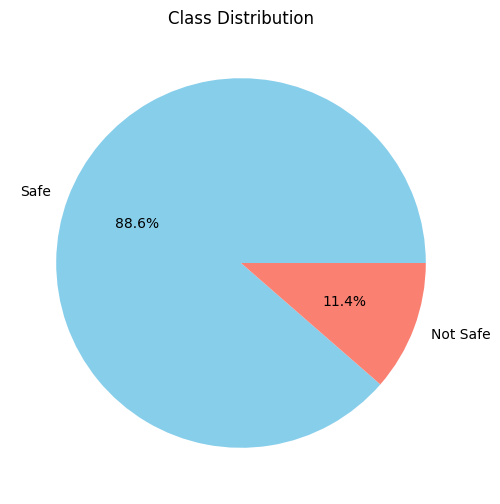

In [ ]:
# Count the occurrences of each class in the 'is_safe' column
class_counts = df['is_safe'].value_counts()

# Plot the pie plot
plt.figure(figsize=(8, 6))
class_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], labels=['Safe', 'Not Safe'])
plt.title('Class Distribution')
plt.ylabel('')  # Hide the y-label for better appearance
plt.show()

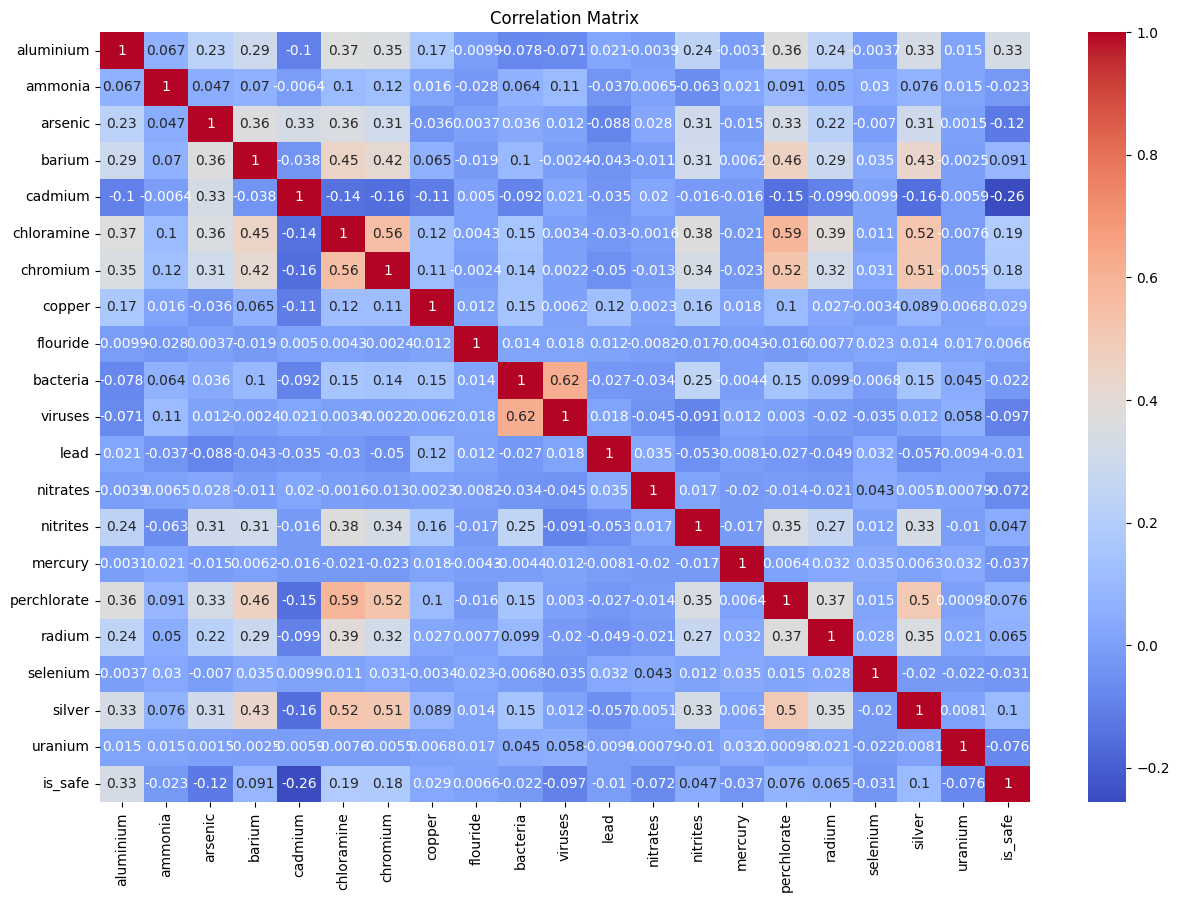

In [ ]:
# Calculate correlation matrix
corr_matrix = df.corr()
# Plot the correlation matrix using heatmap
fig, ax = plt.subplots(figsize=(15,10))    #size
sns.heatmap(corr_matrix, ax=ax, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**The analysis indicates that there are no significant or questionable high correlations among the independent features.**

### Data Splitting into (training and testing)
- then we do data preprocessing and engineering to prevent data leakage

In [3]:
#drop missing value
df.dropna(inplace=True)

In [4]:
# Address Class Imbalance
# Compute the imbalance ratio
imbalance_ratio = df['is_safe'].value_counts()[0] / df['is_safe'].value_counts()[1]
imbalance_ratio

7.767543859649122

In [17]:
X = df.drop(columns=['is_safe'])
y = df['is_safe']

# Resampling Techniques (SMOTE)
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Number of rows in X_train:", X_train.shape)
print("Number of rows in X_test:", X_test.shape)
print("Number of rows in y_train:", y_train.shape)
print("Number of rows in y_test:", y_test.shape)

Number of rows in X_train: (6396, 20)
Number of rows in X_test: (1600, 20)
Number of rows in y_train: (6396,)
Number of rows in y_test: (1600,)


### Data preprocessing and feature selection

In [18]:
# Scale the features to a range of [0, 1]
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The code below selects the top 100 features from the training data based on the chi-squared test

In [19]:
# Select top features
selector = SelectKBest(score_func=chi2, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

print("Shapes of transformed data after feature selection:")
print("X_train_selected:", X_train_selected.shape)
print("X_test_selected:", X_test_selected.shape)

Shapes of transformed data after feature selection:
X_train_selected: (6396, 10)
X_test_selected: (1600, 10)


## Model Training and Evaluation

In [20]:
# 1. Multi-Layer Perceptron (MLP)
mlp = MLPClassifier(max_iter=1000, random_state=42)
parameters = {
    'hidden_layer_sizes': [(50,), (50, 50)],
    'alpha': [0.0001, 0.001, 0.01],
    'solver': ['adam', 'sgd'],
}

# Set sample weights for class balancing
sample_weights = (imbalance_ratio if imbalance_ratio > 1 else 1)

# Update sample weights within the GridSearchCV object
mlp_grid_search = GridSearchCV(mlp, parameters, cv=3)
mlp_grid_search.fit_params = {'sample_weight': sample_weights}

# Fit the model with sample weights for class balancing
mlp_grid_search.fit(X_train_selected, y_train)
best_mlp = mlp_grid_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

In [21]:
  # 2. Support Vector Machine (SVM)
svm = SVC(kernel='rbf', random_state=42)
parameters = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],

}



svm_grid_search = GridSearchCV(svm, parameters, cv=3)
svm_grid_search.fit(X_train_selected, y_train)
best_svm = svm_grid_search.best_estimator_


In [22]:
# 3. Random Forest (Ensemble learning technique)
rf = RandomForestClassifier(random_state=42)
parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
}
rf_grid_search = GridSearchCV(rf, parameters, cv=3)
rf_grid_search.fit(X_train_selected, y_train)
best_rf = rf_grid_search.best_estimator_


In [23]:
# Model evaluation
models = {'MLP': best_mlp, 'SVM': best_svm, 'Random Forest': best_rf}
for name, model in models.items():
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {accuracy:.2f}")
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))


MLP accuracy: 0.94
Confusion Matrix for MLP:
[[1379   21]
 [  68  132]]
Classification Report for MLP:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      1400
         1.0       0.86      0.66      0.75       200

    accuracy                           0.94      1600
   macro avg       0.91      0.82      0.86      1600
weighted avg       0.94      0.94      0.94      1600

SVM accuracy: 0.94
Confusion Matrix for SVM:
[[1378   22]
 [  70  130]]
Classification Report for SVM:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      1400
         1.0       0.86      0.65      0.74       200

    accuracy                           0.94      1600
   macro avg       0.90      0.82      0.85      1600
weighted avg       0.94      0.94      0.94      1600

Random Forest accuracy: 0.95
Confusion Matrix for Random Forest:
[[1381   19]
 [  67  133]]
Classification Report for Random Forest:
       

### **Model Evaluation Results:**

We evaluated three machine learning models (Multi-Layer Perceptron, Support Vector Machine, and Random Forest) on the task of predicting water safety based on a set of features. The features were preprocessed using standard scaling, and various model evaluation metrics were calculated to assess the performance of each model.

#### **Overall Performance:**

- Accuracy: All models achieved high accuracy scores, ranging from 0.94 to 0.95, indicating their ability to correctly classify instances into the correct class.
Individual Model Performance:

**1- Multi-Layer Perceptron (MLP):**

* Achieved an accuracy of 0.94.

* Demonstrated a precision of 0.86 and recall of 0.66 for the positive class (1.0).
* Balanced performance across both classes, with high precision and recall for the majority class (0.0) and improved performance for the minority class (1.0).

**2- Support Vector Machine (SVM):**

* Attained a similar accuracy of 0.94.
* Showed consistent precision and recall values compared to the MLP model, with slightly lower performance for the positive class.

**3- Random Forest:**

* Outperformed the other models with an accuracy of 0.95.
* Demonstrated the highest precision (0.88) and recall (0.67) for the positive class, resulting in a balanced F1-score.

**Interpretation:**

* The models exhibit robust performance in predicting water safety, with Random Forest achieving the highest accuracy and balanced precision-recall trade-off for both classes.
* Standard scaling of features appears to have positively impacted model performance, leading to improved classification accuracy and discriminatory power.
* Further fine-tuning and ensemble techniques could potentially enhance the performance of the models, especially for the minority class.

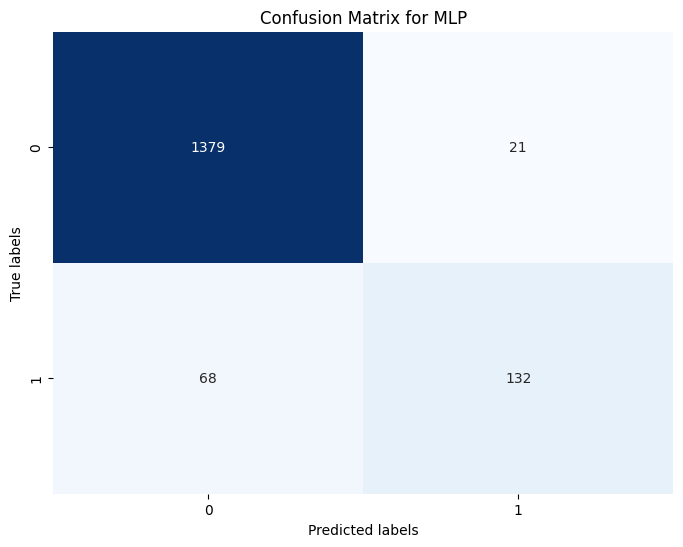

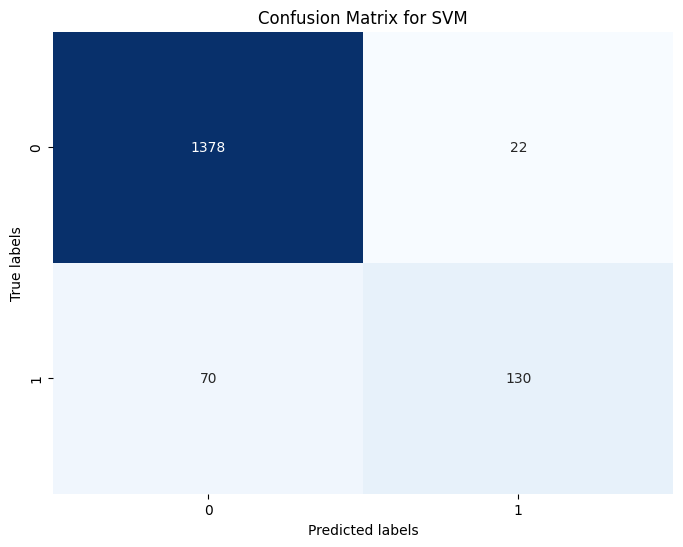

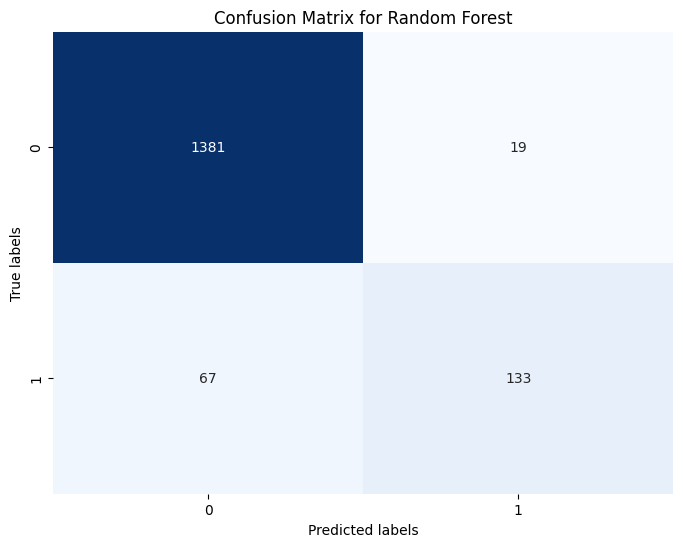

In [24]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# Visualize confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test_selected)
    plot_confusion_matrix(y_test, y_pred, f'Confusion Matrix for {name}')

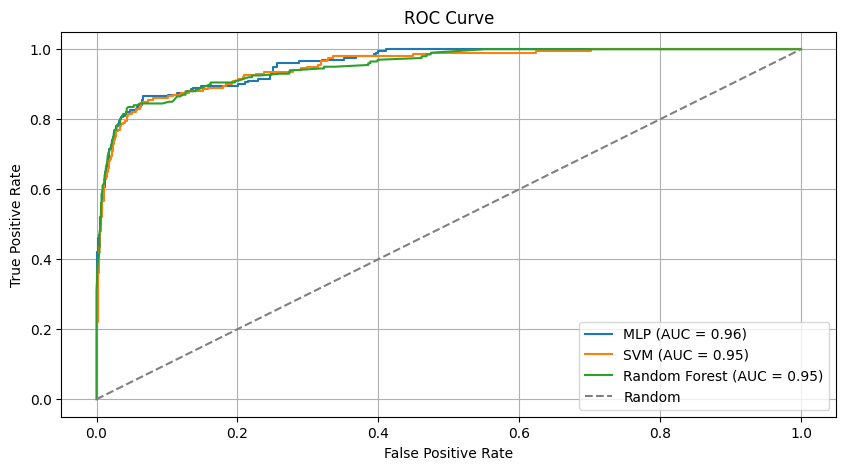

In [26]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Dictionary to store fpr, tpr, precision, recall for each model
metrics = {}

# Compute ROC and Precision-Recall curves for each model
for name, model in models.items():
    # Compute probabilities for positive class
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_selected)[:, 1]
    else:
        y_prob = model.decision_function(X_test_selected)

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Compute Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)

    # Store metrics
    metrics[name] = {'fpr': fpr, 'tpr': tpr, 'precision': precision, 'recall': recall,
                     'roc_auc': roc_auc, 'pr_auc': pr_auc}

# Plot ROC curves
plt.figure(figsize=(10, 5))
for name, metric in metrics.items():
    plt.plot(metric['fpr'], metric['tpr'], label=f'{name} (AUC = {metric["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


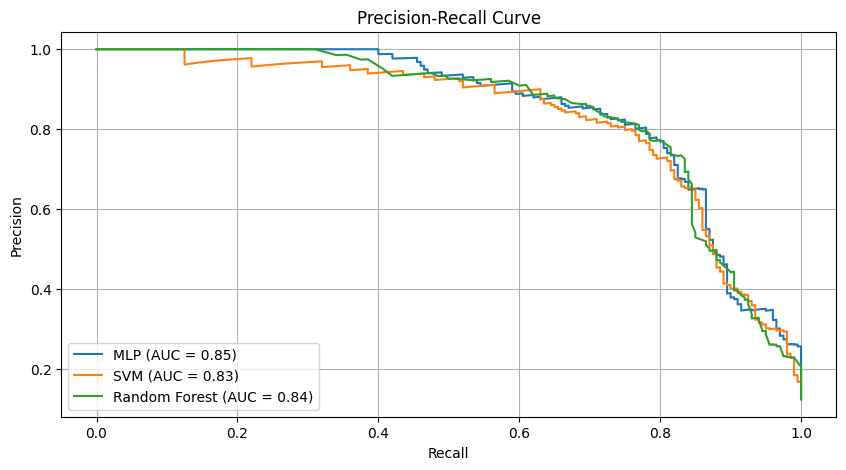

In [27]:
# Plot Precision-Recall curves
plt.figure(figsize=(10, 5))
for name, metric in metrics.items():
    plt.plot(metric['recall'], metric['precision'], label=f'{name} (AUC = {metric["pr_auc"]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()